# K means clustering for iris dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'petal width (cm)')

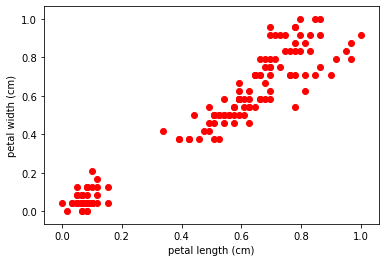

In [35]:
%matplotlib inline 
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color ='red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

## Using Kmeans clustering Algorithm

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [37]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [38]:
y_predicted


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
df['cluster'] =y_predicted

In [40]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


In [41]:
df0 = df[df.cluster==0]
df1= df[df.cluster==1]
df2= df[df.cluster==2]



Text(0, 0.5, 'petal width (cm)')

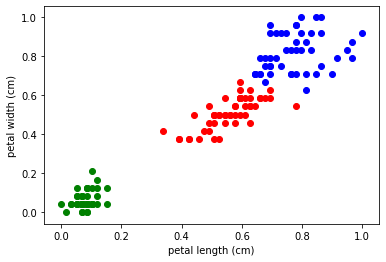

In [42]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color ='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color ='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color ='green')



plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

## For scaling value 

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scalar = MinMaxScaler()

In [45]:
scalar.fit(df[['petal length (cm)']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])

In [47]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


In [48]:
scalar.fit(df[['petal width (cm)']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
df['petal width (cm)'] = scalar.transform(df[['petal width (cm)']])

In [50]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


In [22]:
df = df.drop(df[['sepal length (cm)', 'sepal width (cm)']], axis='columns')

In [23]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [24]:
df0 = df[df.cluster==0]
df1= df[df.cluster==1]
df2= df[df.cluster==2]



Text(0, 0.5, 'petal width (cm)')

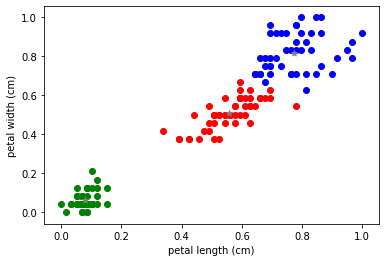

In [51]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color ='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color ='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color ='green')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "gray",marker="*")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [52]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.7740113 , 0.81510417],
       [0.07830508, 0.06083333]])

In [53]:
k_rang = range(1,10)
sse = []
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [54]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.853861735391224,
 0.6801035704886196,
 0.5651273455703979,
 0.48699860502649284,
 0.41326677825124736]

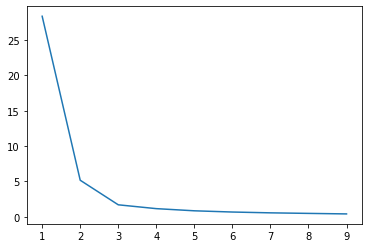

In [55]:
plt.plot(k_rang, sse)

## Conclusion
From Elbow method we get that the dataset must have three clusters